#### `Выполнил: Евсеев Елисей , 24.03.2022`





> # **Домашнее задание №3**.

### **Задача 2**

Пусть $X_1...X_n \sim U[0, \theta_0]$, $\theta_0 >0$. 

Известно, что ОМП для параметра $\theta_0$ равна

$$\tilde{\theta_n}=maxX_i$$



*  Исследуйте скорость сходимости оценки $\tilde{\theta_n}$ к истинному значению параметра $\theta_0$. Иными словами, необходимо найти (хотя бы приближенно) порядок убывания разности в виде функции от $n$.  

*  Продемонстрируйте асимптотическую несмещенность оценки.



In [ ]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy 

%matplotlib inline

In [ ]:
np.random.seed(42)

Положим параметр $\theta_0= 2$. Далее по равномерному распределению с параметром $\theta_0=2$ будем генерировать выборку при помощи *numpy*.

In [ ]:
theta_0 = 2.0

Данная функция считает смещение оценки $\tilde{\theta_n}$:

$$bias(\tilde{\theta_n})=E_{\tilde{\theta_n}}-\theta_0$$

Матожидание от оценки $\tilde{\theta_n}$ будем считать для равномерного дискретного распределения как среднее: $E[X] = \frac{1}{k}\sum_{i=1}^kx_i$

In [ ]:
def calc_diff_theta_n_theta_0(n, k=100):
    theta_tildas_mean = []
    for _ in range(k):
        gen_n_uni_samples = np.random.uniform(0, 2, size=n)
        theta_tilda = max(gen_n_uni_samples)
        theta_tildas_mean.append(theta_tilda)
    math_exp_theta_n = sum(theta_tildas_mean) / k
    return abs(math_exp_theta_n - theta_0) 

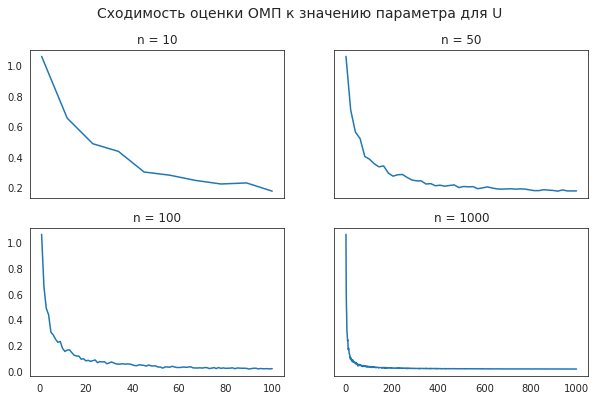

In [ ]:
x_axis = []
y_axis = []

sns.set_style("white")
fig, axs = plt.subplots(2, 2, figsize=(10,6))
fig.suptitle('Сходимость оценки ОМП к значению параметра для U', fontsize=14)

for i in range(1, 1001):
    x_axis.append(i)
    y_axis.append(calc_diff_theta_n_theta_0(i))
    if i == 10:
        axs[0, 0].plot(x_axis, y_axis)
        axs[0, 0].set_title(f'n = {i}')
    if i == 50:
        axs[0, 1].plot(x_axis, y_axis)
        axs[0, 1].set_title(f'n = {i}')
    if i == 100:
        axs[1, 0].plot(x_axis, y_axis)
        axs[1, 0].set_title(f'n = {i}')
    if i == 1000:
        axs[1, 1].plot(x_axis, y_axis)
        axs[1, 1].set_title(f'n = {i}')

for ax in axs.flat:
    ax.label_outer()

Как видим смещение стремится к нулю, а график сходимости имеет характер схожий с гиперболой $\sim \frac{1}{n}$.

Теперь будем искать матожидание $E_{\tilde{\theta_n}}$ и посмотрим, как оно сходится к $\theta_0$, ведь нам нужно показать, что 

$$E_{\tilde{\theta_n}} \to \theta_0 ~~\text{при n $\to \infty$}$$

In [ ]:
def get_math_exp_theta_n(n, theta_0=2.0, k=100):
    theta_tildas_mean = []
    for _ in range(k):
        gen_n_uni_samples = np.random.uniform(0, theta_0, size=n)
        theta_tilda = max(gen_n_uni_samples)
        theta_tildas_mean.append(theta_tilda)
    math_exp_theta_n = sum(theta_tildas_mean) / k
    return math_exp_theta_n

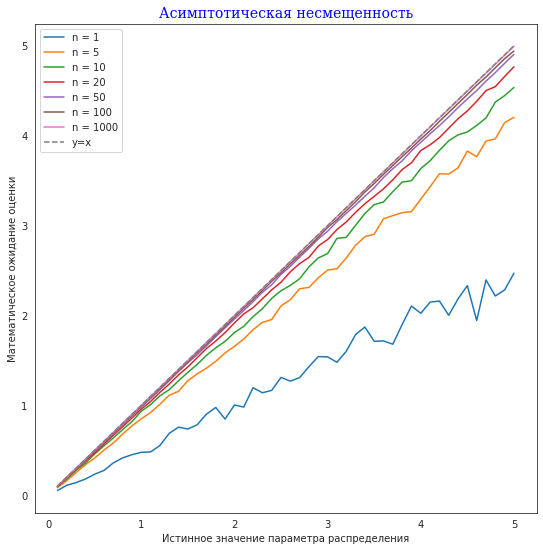

In [ ]:
n_list = [1, 5, 10, 20, 50, 100, 1000]

fig = plt.figure(figsize=(9,9))
sns.set_style("white")

for n in n_list:
    x_axis = []
    y_axis = []
    benchmark = []
    for theta_0 in np.arange(0.1, 5.1, 0.1):
            x_axis.append(theta_0)
            y_axis.append(get_math_exp_theta_n(n, theta_0))
            benchmark.append(theta_0)
    plt.plot(x_axis, y_axis, label=f'n = {n}')
 
plt.plot(benchmark, benchmark, label = "y=x", linestyle="dashed")
plt.xlabel('Истинное значение параметра распределения')
plt.ylabel('Математическое ожидание оценки')
plt.legend()
plt.title("Асимптотическая несмещенность", fontdict = {'family':'serif','color':'blue','size':14})
plt.show()

Как видим, при увеличении $n$ график со значениями $E_{\tilde{\theta_n}}$ по оси $y$ и различными значениями параметра $\theta_0$ в диапазоне $[0.1, 5.0]$ с шагом $0.1$ стремится к графику $y=x$, что говорит о $$\lim_{n \to \infty}E_{\tilde{\theta_n}} = \theta_0$$  то, что нам и нужно было показать.